# MLE and Hypothesis Testing

### Read the given csv file [```q4.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv) of samples. Assume that it is drawn from a exponential distribution. What is the difference of log likelihoods for $\lambda = 1$ and $\lambda = 2$ ? Which of the two is more strongly supported?

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
url = 'https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv'
data = pd.read_csv(url,header=None)

# PDF of exponential distribution is $\lambda e^{-\lambda x}$
Define a function to find pdf. You can use any module to get pre-defined functions also. And then find the likelihood and log-likelihood

In [3]:
#function to find pdf
def exp_dist(lam, x):
  return lam*np.exp(-lam*x)
# likelihood is multiplication of all probabilities
likelihood1 = 1
likelihood2 = 1

for aa in data[1]:
  likelihood1 = likelihood1*exp_dist(1, aa)
  likelihood2 = likelihood2*exp_dist(2, aa)

log_likelihood1 = np.log(likelihood1)
log_likelihood2 = np.log(likelihood2)
print(log_likelihood1)
print(log_likelihood2)

# lambda = 2 is more strongly supported

-48.94830108538966
-28.581884114784785


### Read the csv files [```q4_1.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv) and [```q4_2.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv) to get samples from two unknown distributions. Choose a significance level and implement the the most general two-sample t-test

In [0]:
sample1 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv',header=None)
sample2 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv',header=None)

# sample1

Find the parameters required to compute the T statistic

In [0]:
significance = 0.5
mu1 = sample1[1].mean()
mu2 = sample2[1].mean()
s1 = sample1[1].var()
s2 = sample2[1].var()
n1 = sample1.shape[0]
n2 = sample2.shape[0]

Find the degrees of freedom to get the critical value

In [0]:
T = (mu1-mu2)/np.sqrt((s1/n1)+(s2/n2))
df = np.square((s1/n1)+(s2/n2))/(((s1/n1)**2)/(n1-1)+((s2/n2)**2)/(n2-1))

Compare the critical value and the T statistic and conclude whether null hypothesis is accepted or not. Print 'YES' is it is rejected, otherwise print 'NO'.

In [7]:
Critical_value = stats.t.pdf((1-significance)/2,df)
print("T: ",np.abs(T))
print("Critical_value: ", Critical_value)
if np.abs(T)> Critical_value:
  print('YES')
else:
  print('NO')

T:  16.820688596866056
Critical_value:  0.38593069064638025
YES


Plot the distribution of both the samples to visualize

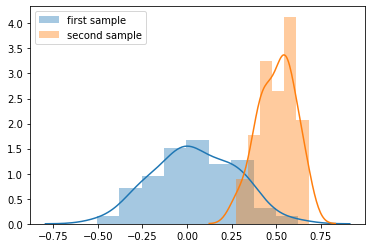

In [8]:
sns.distplot(sample1[1].values)

sns.distplot(sample2[1].values)
plt.legend(['first sample','second sample'])
plt.show()

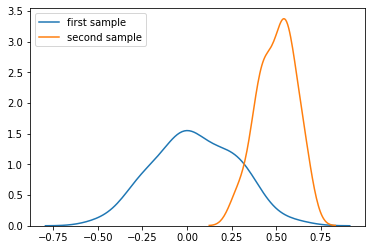

In [14]:
sns.kdeplot(sample1[1])
sns.kdeplot(sample2[1])
plt.legend(['first sample','second sample'])
plt.show()